In [44]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#This method hides any warnings in jupyter notebook
import warnings
warnings.filterwarnings("ignore")

In [45]:
conn = sqlite3.connect(r"C:\Users\HP\Desktop\Elevate_Labs\salesdb.db")

In [46]:
import sqlite3
import pandas as pd

conn = sqlite3.connect(r"C:\Users\HP\Desktop\Elevate_Labs\salesdb.db")
query_all = "SELECT * FROM sales"

df_all = pd.read_sql_query(query_all, conn)

conn.close()

print("All Sales Data:")
print(df_all)

All Sales Data:
   id brand_name     price  battery_capacity   brand_model  quantity
0  11    OnePlus     35000              5000           10R         5
1  12     Iphone  1,36,000              6000         16Pro        15
2  13    Samsung     15000              4000           M21        10
3  14     Realme     16999              6000            P3        20
4  15   Motorola    18,820              5000  Edge50Fusion        30


In [47]:
import sqlite3
import pandas as pd

conn = sqlite3.connect(r"C:\Users\HP\Desktop\Elevate_Labs\salesdb.db")  

query_revenue = "SELECT SUM(quantity * price) AS total_revenue FROM sales"

df_revenue = pd.read_sql_query(query_revenue, conn)

conn.close()

print("Total Revenue:")
print(df_revenue)

Total Revenue:
   total_revenue
0         665535


In [48]:
import sqlite3
import pandas as pd

conn = sqlite3.connect(r"C:\Users\HP\Desktop\Elevate_Labs\salesdb.db") 


query_quantity = """
SELECT 
    brand_model, 
    SUM(quantity) AS total_quantity 
FROM sales 
GROUP BY brand_model
"""

df_quantity = pd.read_sql_query(query_quantity, conn)

conn.close()

print("Total Quantity Sold per Product:")
print(df_quantity)

Total Quantity Sold per Product:
    brand_model  total_quantity
0           10R               5
1         16Pro              15
2  Edge50Fusion              30
3           M21              10
4            P3              20


Total Quantity Sold per brand:
    brand_model  total_quantity
0           10R               5
1         16Pro              15
2  Edge50Fusion              30
3           M21              10
4            P3              20


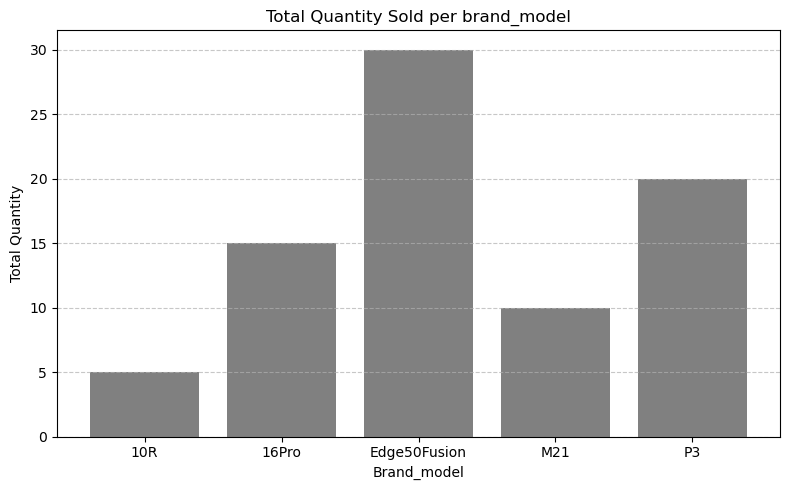

In [49]:
import sqlite3
import pandas as pd

conn = sqlite3.connect(r"C:\Users\HP\Desktop\Elevate_Labs\salesdb.db") 

query_quantity = """
SELECT 
    brand_model, 
    SUM(quantity) AS total_quantity 
FROM sales 
GROUP BY brand_model
"""

df_quantity = pd.read_sql_query(query_quantity, conn)

conn.close()

print("Total Quantity Sold per brand:")
print(df_quantity)

plt.figure(figsize=(8, 5))
plt.bar(df_quantity['brand_model'], df_quantity['total_quantity'], color='grey')
plt.title("Total Quantity Sold per brand_model")
plt.xlabel("Brand_model")
plt.ylabel("Total Quantity")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Revenue per Product:
    brand_model  revenue
0           10R   175000
1         16Pro       15
2  Edge50Fusion      540
3           M21   150000
4            P3   339980


<Figure size 1000x600 with 0 Axes>

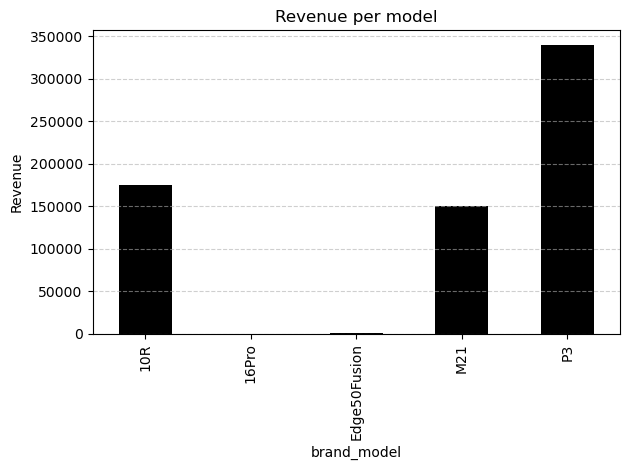

In [50]:
import sqlite3
import pandas as pd
conn = sqlite3.connect(r"C:\Users\HP\Desktop\Elevate_Labs\salesdb.db") 

query_revenue = """
SELECT 
    brand_model, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY brand_model
"""

df_revenue = pd.read_sql_query(query_revenue, conn)

conn.close()

print("Revenue per Product:")
print(df_revenue)

plt.figure(figsize=(10, 6))
df_revenue.plot(kind='bar', x='brand_model', y='revenue', legend=False, color='black')
plt.title("Revenue per model")
plt.xlabel("brand_model")
plt.ylabel("Revenue")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Average Units Sold per Model:
    brand_model  avg_units_sold
0           10R             5.0
1         16Pro            15.0
2  Edge50Fusion            30.0
3           M21            10.0
4            P3            20.0


<Figure size 800x400 with 0 Axes>

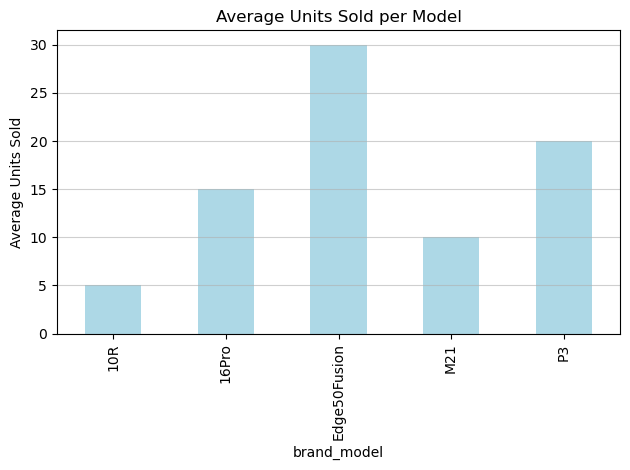

In [51]:
import sqlite3
import pandas as pd
conn = sqlite3.connect(r"C:\Users\HP\Desktop\Elevate_Labs\salesdb.db") 

query_avg_units = """
SELECT 
    brand_model, 
    AVG(quantity) AS avg_units_sold 
FROM sales 
GROUP BY brand_model
"""

df_avg_units = pd.read_sql_query(query_avg_units, conn)

conn.close()

print("Average Units Sold per Model:")
print(df_avg_units)

plt.figure(figsize=(8, 4))
df_avg_units.plot(kind='bar', x='brand_model', y='avg_units_sold', legend=False, color='lightblue')
plt.title("Average Units Sold per Model")
plt.xlabel("brand_model")
plt.ylabel("Average Units Sold")
plt.grid(axis='y', linestyle='-', alpha=0.6)
plt.tight_layout()

plt.show()

Top 5 Models by Units Sold:
    brand_model  total_units_sold
0  Edge50Fusion                30
1            P3                20
2         16Pro                15
3           M21                10
4           10R                 5


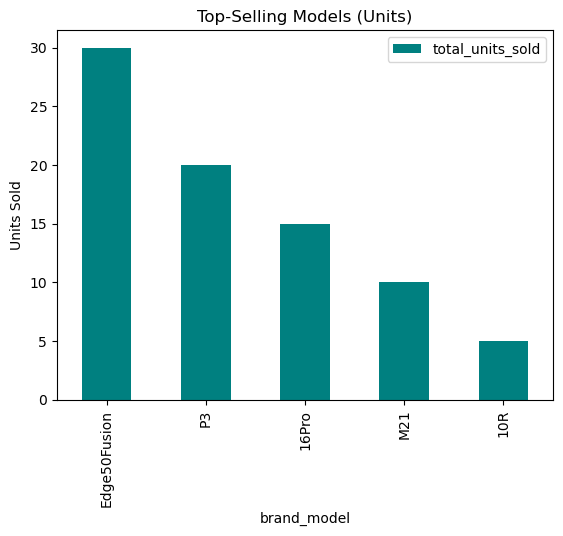

In [52]:
import sqlite3
import pandas as pd
conn = sqlite3.connect(r"C:\Users\HP\Desktop\Elevate_Labs\salesdb.db") 

query = """
SELECT 
    brand_model,
    SUM(quantity) AS total_units_sold
FROM sales
GROUP BY brand_model
ORDER BY total_units_sold DESC
LIMIT 5
"""

df = pd.read_sql_query(query, conn)
print("Top 5 Models by Units Sold:")
print(df)

df.plot(kind='bar', x='brand_model', y='total_units_sold', color='teal', title="Top-Selling Models (Units)")
plt.ylabel("Units Sold")
plt.show()

Transaction Count by brand_model:
 brand_model  num_transactions  pct_of_total
          P3                 1          20.0
         M21                 1          20.0
Edge50Fusion                 1          20.0
       16Pro                 1          20.0
         10R                 1          20.0


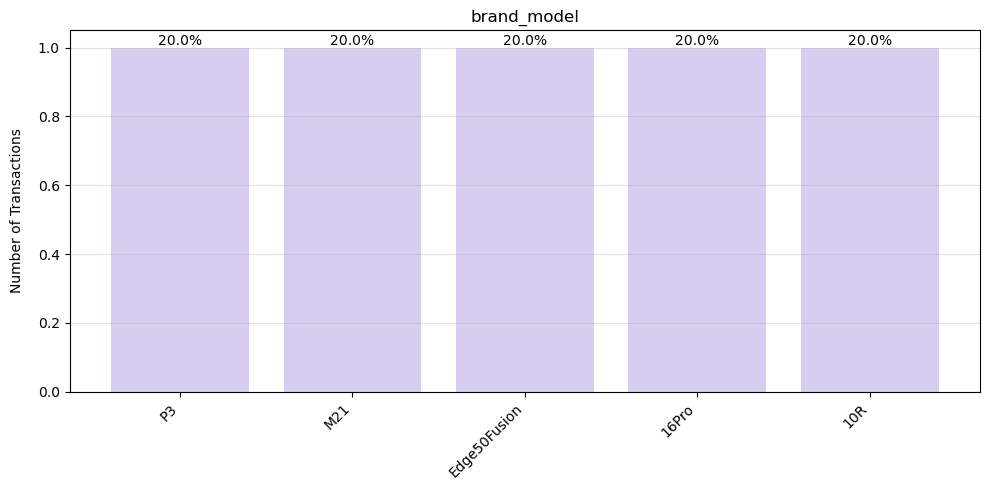

Text(0.5, 0.8, 'Transaction Summary')

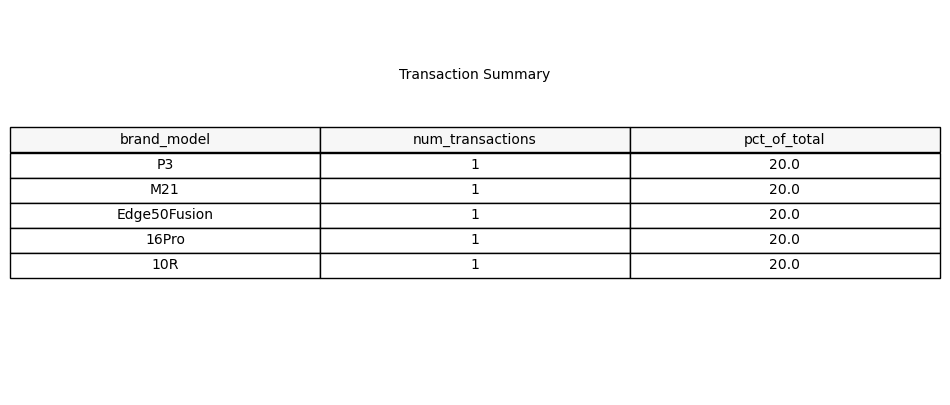

In [53]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

conn = sqlite3.connect(r"C:\Users\HP\Desktop\Elevate_Labs\salesdb.db") 

query = """
SELECT 
    brand_model, 
    COUNT(*) AS num_transactions,
    ROUND(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM sales), 1) AS pct_of_total
FROM sales
GROUP BY brand_model
ORDER BY num_transactions DESC
"""

df = pd.read_sql_query(query, conn)
conn.close()

print("Transaction Count by brand_model:")
print(df.to_string(index=False))

plt.figure(figsize=(10, 5))

bars = plt.bar(df['brand_model'], df['num_transactions'], color='#C7B8EA', alpha=0.7)
plt.title('brand_model')
plt.ylabel('Number of Transactions', labelpad=10)
plt.xticks(rotation=45, ha='right')

for bar, pct in zip(bars, df['pct_of_total']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{pct}%', ha='center', va='bottom')

plt.grid(axis='y', linestyle='-', alpha=0.4)

plt.tight_layout()

plt.show()

fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('off')
table = ax.table(cellText=df.values,
                 colLabels=df.columns,
                 loc='center',
                 cellLoc='center',
                 colColours=['#f7f7f7']*len(df.columns))
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)
plt.title('Transaction Summary', y=0.8, fontsize=10)


Price vs. Demand Analysis:
    brand_model  avg_price  total_units_sold
0           10R    35000.0                 5
1         16Pro        1.0                15
2  Edge50Fusion       18.0                30
3           M21    15000.0                10
4            P3    16999.0                20


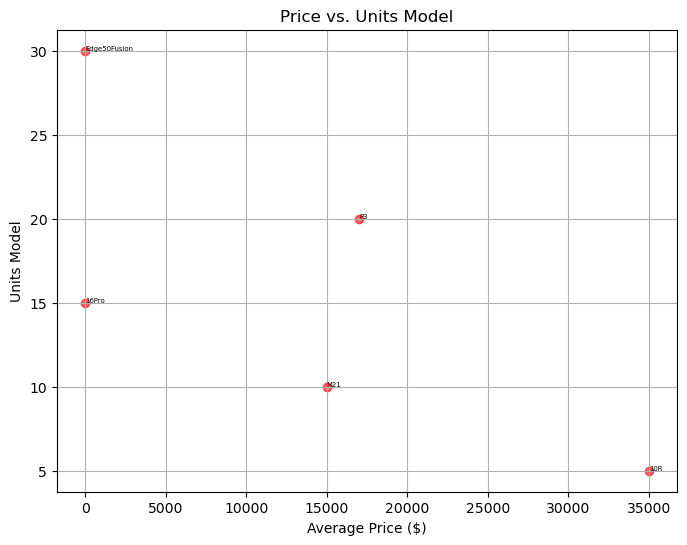

In [41]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect(r"C:\Users\HP\Desktop\Elevate_Labs\salesdb.db")

query = """
SELECT 
    brand_model,
    AVG(price) AS avg_price,
    SUM(quantity) AS total_units_sold
FROM sales
GROUP BY brand_model
"""

df = pd.read_sql_query(query, conn)
print("Price vs. Demand Analysis:")
print(df)

plt.figure(figsize=(8, 6))
plt.scatter(df['avg_price'], df['total_units_sold'], color='red', alpha=0.6)
plt.title("Price vs. Units Model")
plt.xlabel("Average Price ($)")
plt.ylabel("Units Model")
plt.grid(True)

for i, row in df.iterrows():
    plt.text(row['avg_price'], row['total_units_sold'], row['brand_model'], fontsize=5)

plt.show()
